## __Toxic Comments Detection__

### 1. Dataset Collection
Let's start by acquiring our dataset from an external source.

We are providing a __CSV file hosted on Google Drive__, from which we will extract our data.

The origin of the texts are from __movie reviews__, these were web scrapped years ago for another project.

The columns of our dataset are as follows:
- __text__: raw user review textual data
- __label__: 0 --> user does not recommend the movie, 1 --> user recommends the movie

First, to gather our data, let's import some required libraries.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request

Let's create a __Helper class__ that will allow us to __extract (download) the data__ from its original source (Google Drive).

This class will also allow us to __read the file and return a DataFrame__ from Pandas library.

In [22]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset from the original source Google Drive
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset, and return the DataFrame from Pandas
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue
                # let's create a generator so we don't store the whole content in memory
                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path, encoding="utf-8") as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

Let's __instantiate our Helper class__ and __donwload the data from its original source__ and obtain the data from the file as a __DataFrame__.

In [21]:
# instantiate our custom Helper class
helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)
# download our dataset from its original source
helper.download_dataset()
# read the dataset as a DataFrame from Pandas
df = helper.read_dataset('dataset')
df.head()

,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


Now we have the dataset ready for an exploratory data analysis inside the __df__ variable.

### 2. Exploratory Data Analysis

In [55]:
class ExploratoryDataAnalysis:
    
    def __init__(self, df):
        self.df = df
        
    def get_basic_analysis(self):
        print("-"*30)
        print("# Rows:\t", df.shape[0])
        print("# Columns:", df.shape[1])
        print("-"*30)
        print("Value counts:")
        # check for the distribution of target values
        print(df['label'].value_counts())
        print("-"*30)
        # check for missing values
        print("Missing values:")
        print(df.isnull().sum().mean())
        print("-"*30)
        # check for duplicate values
        print("Duplicated values:")
        print(df.duplicated().sum())
        print("-"*30)
    
    def plot_basic_analysis(self):
        pass
        

In [56]:
eda = ExploratoryDataAnalysis(df)
eda.get_basic_analysis()

------------------------------
# Rows:	 28643
# Columns: 2
------------------------------
Value counts:
label
0    27256
1     1387
Name: count, dtype: int64
------------------------------
Missing values:
0.0
------------------------------
Duplicated values:
352
------------------------------


In [8]:
# check for all the special characters
df['text'].str.extractall(r'([^a-zA-Z\s])')[0].value_counts()


0
.    27248
,    16314
'     7006
!     6092
?     3846
     ...  
μ        1
ύ        1
ď        1
ז        1
ú        1
Name: count, Length: 257, dtype: int64

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.head(2)



,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18


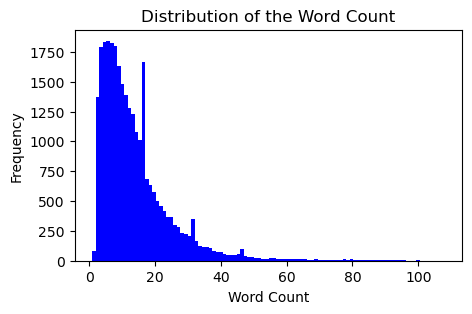

In [17]:
# Plot the distribution of the word count

plt.figure(figsize=(5, 3))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Plot the distribution of the stopword count

In [14]:
# Apply bag of words to the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df['text']).toarray()


In [15]:
cv.get_feature_names_out()

array(['00', '000', '004', ..., 'ٱلز', 'ٱلس', 'ٱلل'], dtype=object)

In [16]:
feature_names = cv.get_feature_names_out()
pd.DataFrame(bag_of_words, columns = feature_names)

,00,000,004,005,008,009,01,0131,02,03,...,يمكن,ين,يه,يهودية,يوميا,ٱل,ٱلذ,ٱلز,ٱلس,ٱلل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perform Clean up and data analysis